#Diabetes Data Analytics Project



#1. Motivation/Synopsis

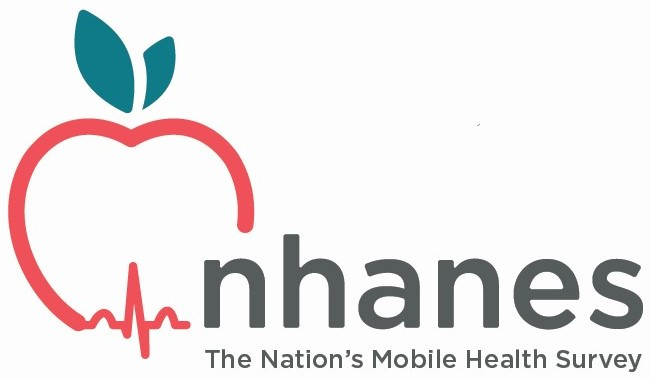





Data analytics projects have become increasingly popular in recent years, and one project that has the potential to make a significant impact is elucidating the relationship between demographic and nutrition factors and diabetes in  NHANES data. By using sophisticated statistical techniques and data visualization tools, this project aims to uncover the underlying patterns and trends that link these variables and identify key risk factors associated with diabetes. With the rising prevalence of diabetes in the US, understanding these relationships can help healthcare providers develop more effective prevention and treatment strategies, ultimately improving the lives of millions of individuals affected by this disease. This project offers an exciting opportunity to apply cutting-edge data analytics techniques to a complex public health problem and contribute to our understanding of the factors that influence diabetes risk.


> For context the National Health and Nutrition Examination Survey (NHANES) is a program aimed at examining the nutritional and health status of adults and children in the United States. It is an exceptional survey that uses both questionnaires and physical examinations. The NHANES is a significant program run by the National Center for Health Statistics (NCHS), which is responsible for generating essential health and vital statistics for the country. During the survey, individuals are interviewed about their socioeconomic status, dietary habits, and health-related concerns. Additionally, the examination phase includes medical, dental, and physiological evaluations, as well as laboratory tests performed by highly trained medical personnel. For further information and reading follow this link:
https://www.cdc.gov/nchs/nhanes/about_nhanes.html



---






#2. Data Import, Concatenation, and Cleaning


In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The below cell reads a series of CSV into pandas dataframes for later concatenation. The data acquired is very decentralized in the sense that its is distributed across many different csv's hence the amount of imports that we have to do.

In [ ]:
df_air_quality = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/air_quality.csv')
df_blood_pressure_and_cholestrol = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/blood_pressure___cholesterol.csv')
df_cardiovascular_health = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/cardiovascular_health.csv')
df_current_health_status = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/current_health_status.csv')
df_demographics = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/demographic_variables___sample_weights.csv')
df_diabetes = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/diabetes.csv')
df_dietary_interview_foods = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/dietary_interview___individual_foods__first_day.csv')
df_dietary_interview_nutrients = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/dietary_interview___total_nutrient_intakes__second_day.csv')
df_glycohemoglobin = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/glycohemoglobin.csv')
df_hepatitis_a = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/hepatitis_a.csv')
df_income = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/income.csv')
df_insulin = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/insulin.csv')
df_mercury_1 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/mercury___inorganic__ethyl___methyl___blood.csv')
df_mercury_2 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/mercury__inorganic__ethyl_and_methyl___blood.csv')
df_mercury_3 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/mercury__inorganic__ethyl_and_methyl__blood.csv')
df_reproductive_health = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/reproductive_health.csv')
df_respiratory_health = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/respiratory_health.csv')
df_vitamin_a_e_1 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_a__vitamin_e____carotenoids__second_exam.csv')
df_vitamin_a_e_2 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_a__vitamin_e___carotenoids.csv')
df_vitamin_b12 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_b12.csv')
df_vitamin_b6 = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_b6.csv')
df_vitamin_c = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_c.csv')
df_vitamin_d = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/vitamin_d.csv')
df_weight_history = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/weight_history.csv')


<ipython-input-3-abaab9764b8f>:16: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reproductive_health = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/reproductive_health.csv')


Dropping some deliterious columns that complicate further concatentaion of the data. This column is the index column in each of the df which is actually not the unique key for each tuple.

In [ ]:
df_air_quality = df_air_quality.drop(columns='index')
df_blood_pressure_and_cholestrol = df_blood_pressure_and_cholestrol.drop(columns='index')
df_cardiovascular_health = df_cardiovascular_health.drop(columns='index')
df_current_health_status = df_current_health_status.drop(columns='index')
df_demographics = df_demographics.drop(columns='index')
df_diabetes = df_diabetes.drop(columns='index')
df_dietary_interview_foods = df_dietary_interview_foods.drop(columns='index')
df_dietary_interview_nutrients = df_dietary_interview_nutrients.drop(columns='index')
df_glycohemoglobin = df_glycohemoglobin.drop(columns='index')
df_hepatitis_a = df_hepatitis_a.drop(columns='index')
df_income = df_income.drop(columns='index')
df_insulin = df_insulin.drop(columns='index')
df_mercury_1 = df_mercury_1.drop(columns='index')
df_mercury_2 = df_mercury_2.drop(columns='index')
df_mercury_3 = df_mercury_3.drop(columns='index')
df_reproductive_health = df_reproductive_health.drop(columns='index')
df_respiratory_health = df_respiratory_health.drop(columns='index')
df_vitamin_a_e_1 = df_vitamin_a_e_1.drop(columns='index')
df_vitamin_a_e_2 = df_vitamin_a_e_2.drop(columns='index')
df_vitamin_b12 = df_vitamin_b12.drop(columns='index')
df_vitamin_b6 = df_vitamin_b6.drop(columns='index')
df_vitamin_c = df_vitamin_c.drop(columns='index')
df_vitamin_d = df_vitamin_d.drop(columns='index')
df_weight_history = df_weight_history.drop(columns='index')

Due to the absence of particular types of data we though it would be best to perform a series of outer joins in order to take a more holistic view of the data later on. As expected a myriad of left-outer joins combined with missing data results in many columns having a large amount of null values in the final aggregate dataframe. However, we deal with these issues as they come up in the eda when we consider certain subsets of the columns.

In [ ]:
# The "SEQN" column is the join key that persist/links all the various DFs,
# where each SEQN corresponding to a different respondent
df_main = df_demographics.merge(df_air_quality, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_blood_pressure_and_cholestrol, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_cardiovascular_health, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_current_health_status, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_diabetes, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_dietary_interview_foods, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_dietary_interview_nutrients, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_glycohemoglobin, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_hepatitis_a, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_income, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_insulin, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_mercury_1, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_mercury_2, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_mercury_3, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_reproductive_health, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_respiratory_health, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_a_e_1, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_a_e_2, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_b12, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_b6, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_c, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_vitamin_d, how='outer', left_on='SEQN', right_on='SEQN')
df_main = df_main.merge(df_weight_history, how='outer', left_on='SEQN', right_on='SEQN')

In [ ]:
# Getting an idea of what the table looks like
df_main.head(5)

,#,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,...,WHD170,WHD100H,WHD100I,WHD100K,WHD080T,WHD100T,WHD080U,WHQ225,WHQ190,WHQ200
0,1.0,31127,4.0,2.0,2.0,1.0,0.0,11.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,31128,4.0,2.0,1.0,2.0,11.0,132.0,132.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,31129,4.0,2.0,2.0,1.0,15.0,189.0,190.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,31130,4.0,2.0,2.0,2.0,85.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,31131,4.0,2.0,2.0,2.0,44.0,535.0,536.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Elucidating the tractability of the data by analyzing size, complexity, and
# amount of null values
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252751 entries, 0 to 252750
Columns: 906 entries, # to WHQ200
dtypes: float64(904), int64(1), object(1)
memory usage: 1.7+ GB


Exporting the main df so that team members could work on the data seperately from one another in different notebooks.

In [ ]:
df_main.to_csv('main.csv')

#3. EDA

##EDA I: Premilimenary Analysis of Correlation and Modeling Targets


The initial component of our EDA involves elucidating potential relationships between different column variables in our data, and consequently points of data exploration. As enumerated earlier this is complicated by the presence of an extreme amount of null values, which is the first thing we take care of bby dropping columns that are over 90% null.

### Drop columns that are less than 90% full

In [ ]:
df = df_main

null_percent = df.isnull().mean()

# Select columns with over 90% null values
cols_to_drop = null_percent[null_percent > 0.9].index

# Drop the columns
df = df.drop(cols_to_drop, axis=1)
len(cols_to_drop)

569

In [ ]:
df.head()

,#,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,...,WHD080M,WHQ270,WHQ090,WHQ210,WHD220,WHD110,WHD120,WHD130,WHD140,WHQ150
0,1.0,31127,4.0,2.0,2.0,1.0,0.0,11.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,31128,4.0,2.0,1.0,2.0,11.0,132.0,132.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,31129,4.0,2.0,2.0,1.0,15.0,189.0,190.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,31130,4.0,2.0,2.0,2.0,85.0,NaN,NaN,3.0,...,NaN,NaN,2.0,1.0,15.0,NaN,105.0,62.0,NaN,NaN
4,5.0,31131,4.0,2.0,2.0,2.0,44.0,535.0,536.0,4.0,...,NaN,NaN,2.0,1.0,14.0,145.0,119.0,NaN,164.0,44.0


In [ ]:
df.describe()

,#,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,...,WHD080M,WHQ270,WHQ090,WHQ210,WHD220,WHD110,WHD120,WHD130,WHD140,WHQ150
count,208365.000000,252751.000000,208365.000000,208365.000000,205154.000000,208365.000000,208365.000000,191723.000000,188393.000000,208365.000000,...,25333.000000,48258.000000,86927.000000,68045.000000,68033.000000,103581.000000,122743.000000,71551.000000,145844.000000,138687.000000
mean,22498.845809,52557.655499,4.647158,1.984590,1.537309,1.502095,33.299105,382.699728,384.258157,2.782473,...,33.993368,1.896100,1.806125,1.704049,948.123940,499.886890,705.628125,404.036939,471.757042,740.265555
std,15807.231849,25094.570837,1.264654,0.123179,0.498607,0.499997,25.483922,290.837386,289.969076,1.156086,...,0.282027,0.305134,0.442383,0.488480,9561.037276,2853.096191,4768.017669,1796.872867,4044.034057,8326.933383
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,22.000000,1.000000,1.000000,1.000000,0.000000,50.000000,50.000000,39.000000,73.000000,7.000000
25%,13213.000000,42967.000000,5.000000,2.000000,1.000000,1.000000,10.000000,117.000000,119.000000,2.000000,...,34.000000,2.000000,2.000000,1.000000,10.000000,140.000000,125.000000,64.000000,156.000000,26.000000
50%,16836.000000,47325.000000,5.000000,2.000000,2.000000,2.000000,29.000000,334.000000,336.000000,3.000000,...,34.000000,2.000000,2.000000,2.000000,20.000000,165.000000,145.000000,67.000000,185.000000,40.000000
75%,20450.000000,53114.500000,5.000000,2.000000,2.000000,2.000000,55.000000,631.000000,631.000000,4.000000,...,34.000000,2.000000,2.000000,2.000000,30.000000,195.000000,175.000000,70.000000,220.000000,55.000000
max,71916.000000,124822.000000,7.000000,2.000000,2.000000,2.000000,85.000000,1019.000000,1019.000000,5.000000,...,34.000000,2.000000,9.000000,9.000000,99999.000000,99999.000000,99999.000000,9999.000000,99999.000000,99999.000000


It is clear that we have reduced the data under consideration by quite a significant amount as evidenced by the fact that we have removed 569 columns to yeild a final df with 337 columns. The fact that the filter condition was fairly liberal yet yielded a large reduction indicates that many of the columns would have been very hard to work with originally;.

### Part I: Demographic Data Analysis

The following block of code is meant to analyze relationships that exist between different demographic variables. This analysis is important because it allows to confirm that the data fits expected trends, as a sanity check, and elucidates any surprising relationships that we might not have immediately inferred

####Formatting

The formatting section involves altering the demographics dataframe in such a way that it is more tractable by altering the column names from codes to meaningful descriptors. It also gives us any idea of what operators we can perform on the data.

In [ ]:
dem_df = df_demographics

In [ ]:
dem_df['DMDBORN4'].isna().sum()

62160

In [ ]:
dem_df.dtypes

#             int64
SEQN          int64
SDDSRVYR      int64
RIDSTATR      int64
RIDEXMON    float64
             ...   
AIALANGA    float64
DMDHHSZA    float64
DMDHHSZB    float64
DMDHHSZE    float64
DMDHRBR4    float64
Length: 171, dtype: object

In [ ]:
dem_df.head()

,#,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,...,RIDEXAGY,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,AIALANGA,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRBR4
0,1,31127,4,2,2.0,1,0.0,11.0,12.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,31128,4,2,1.0,2,11.0,132.0,132.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,31129,4,2,2.0,1,15.0,189.0,190.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31130,4,2,2.0,2,85.0,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,31131,4,2,2.0,2,44.0,535.0,536.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imp_columns = [
    'SEQN',
    "RIAGENDR" ,
    "RIDRETH1" ,
    "RIDAGEYR" ,
    "DMDBORN4" ,
    "DMDCITZN" ,
    "DMDEDUC2" ,
    "DMDMARTL" ,
    "DMDHHSIZ" ,
    "DMDFMSIZ" ,
    "INDHHIN2" ,
    "INDFMIN2" ,
    "INDFMPIR",
    # "DMDHRAGZ",
    # "DMDHREDZ",
    # "DMDHRMAZ"
]

dem_df = dem_df[imp_columns]

In [ ]:
dem_names = {
    "RIAGENDR" : "Gender",
    "RIDRETH1" : "Race",
    "RIDAGEYR" : "Age",
    "DMDBORN4" : "Born_In_US",
    "DMDCITZN" : "US_Citizen",
    "DMDEDUC2" : "Education_Level_Adult",
    "DMDMARTL" : "Marital_Status",
    "DMDHHSIZ" : "Num_Household",
    "DMDFMSIZ" : "Num_Family_Members",
    "INDHHIN2" : "Household_Income",
    "INDFMIN2" : "Family_Income",
    "INDFMPIR" : "Income_Poverty_Ratio",
    # "DMDHRAGZ" : "Household_Ref_Age",
    # "DMDHREDZ" : "Household_Ref_Education",
    # "DMDHRMAZ" : "Household_Ref_Marital_Status"
}

dem_df = dem_df.rename(columns=dem_names)
dem_df.head()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,Household_Income,Family_Income,Income_Poverty_Ratio
0,31127,1,3,0.0,NaN,1.0,NaN,NaN,4,4.0,NaN,NaN,0.75
1,31128,2,4,11.0,NaN,1.0,NaN,NaN,7,6.0,NaN,NaN,0.77
2,31129,1,4,15.0,NaN,1.0,NaN,5.0,6,6.0,NaN,NaN,2.71
3,31130,2,3,85.0,NaN,1.0,4.0,2.0,1,1.0,NaN,NaN,1.99
4,31131,2,4,44.0,NaN,1.0,4.0,1.0,4,4.0,NaN,NaN,4.65


In [ ]:
dem_df.describe()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,Household_Income,Family_Income,Income_Poverty_Ratio
count,71916.000000,71916.000000,71916.000000,71916.000000,9756.000000,71891.000000,38018.000000,44506.000000,71916.000000,40790.000000,30197.00000,30225.000000,65788.000000
mean,35958.500000,1.507189,2.809125,30.558499,1.259225,1.117136,3.236914,2.881185,3.828230,3.646654,11.14465,10.882448,2.262799
std,20760.505317,0.499952,1.224667,24.933144,2.069807,0.416094,1.334273,2.931061,1.738142,1.778818,16.00681,16.016022,1.599597
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,17979.750000,1.000000,2.000000,10.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.00000,5.000000,0.930000
50%,35958.500000,2.000000,3.000000,22.000000,1.000000,1.000000,3.000000,2.000000,4.000000,4.000000,7.00000,7.000000,1.780000
75%,53937.250000,2.000000,4.000000,50.000000,1.000000,1.000000,4.000000,5.000000,5.000000,5.000000,14.00000,13.000000,3.550000
max,71916.000000,2.000000,5.000000,85.000000,99.000000,9.000000,9.000000,99.000000,7.000000,7.000000,99.00000,99.000000,5.000000


In [ ]:
len(dem_df.index)

71916

In [ ]:
dem_df.isna().sum()

SEQN                         0
Gender                       0
Race                         0
Age                          0
Born_In_US               62160
US_Citizen                  25
Education_Level_Adult    33898
Marital_Status           27410
Num_Household                0
Num_Family_Members       31126
Household_Income         41719
Family_Income            41691
Income_Poverty_Ratio      6128
dtype: int64

#### Correlations within Demographics

The below code block/section allows us to observe pairwise correleation between the different demographic variables all in one, easy to analyze format (A colormap).

<Axes: >

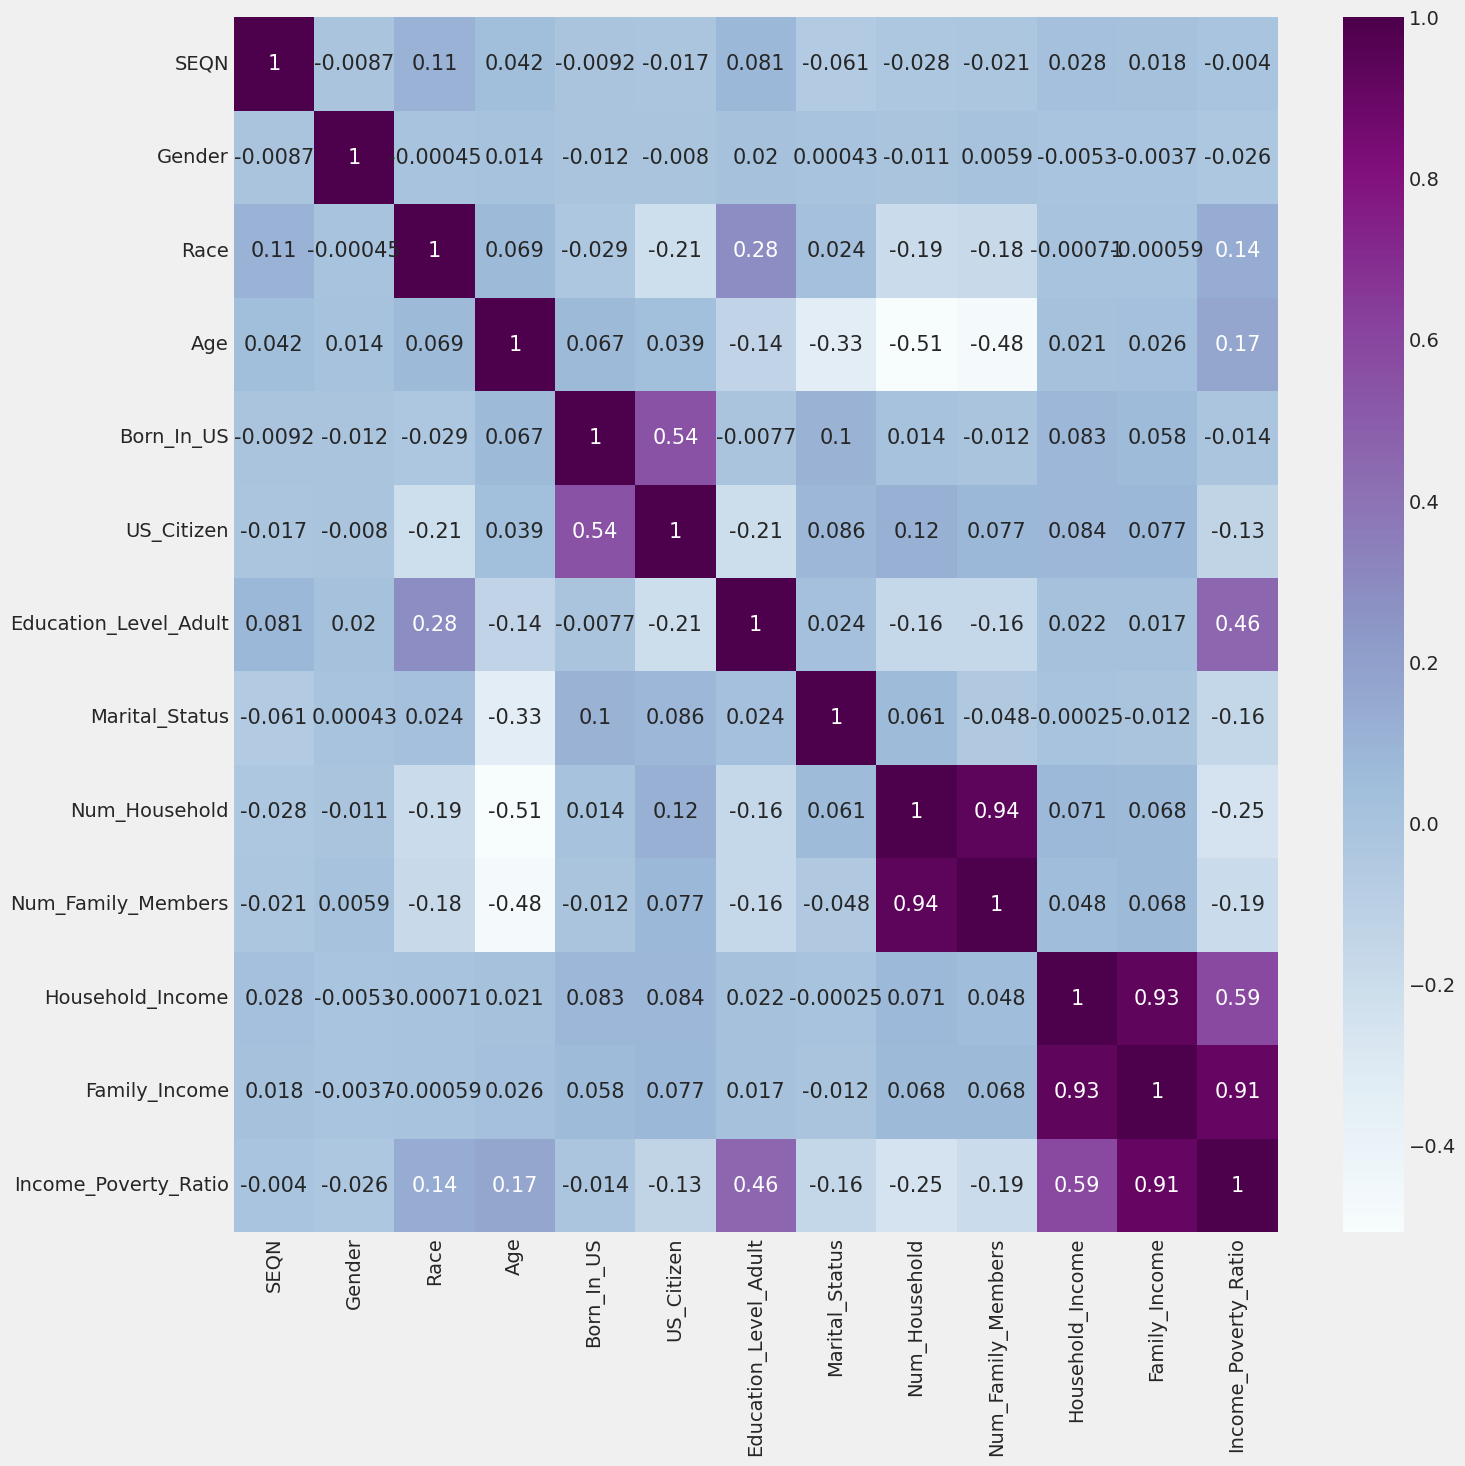

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# This will display the correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(dem_df.corr(), annot=True, cmap="BuPu", annot_kws={"size":15})

This can tell us interesting things about the demographics dataset we are working with. There are expected mathematical relationships that exist between Household Income and Family Income, Family Income and Poverty Ratio, etc.... Additionally there seem to be evidence of correlations between education, race, and income. This, plot also gives us some context for further refinements of the dataset to remove highly correlated variables for modeling purposes.

#### Interesting Relations

Those correlations that seem to be exposed in the above heatmap are further explored in this section. We look at three particularly interesting pairs here.

##### **Education Level and Income Poverty Ratio**

In [ ]:
# Education_Level_Keys = {
#     1 : 'Less than 9th Grade',
#     2 : 'Attended High school',
#     3 : 'Graduated High school',
#     4 : 'Some college or AA degree',
#     5 : 'College Graduate',
#     7 : 'Refused',
#     9 : 'Unknown'
# }

# dem_df['Education_Level_Adult'].replace(Education_Level_Keys, inplace=True)

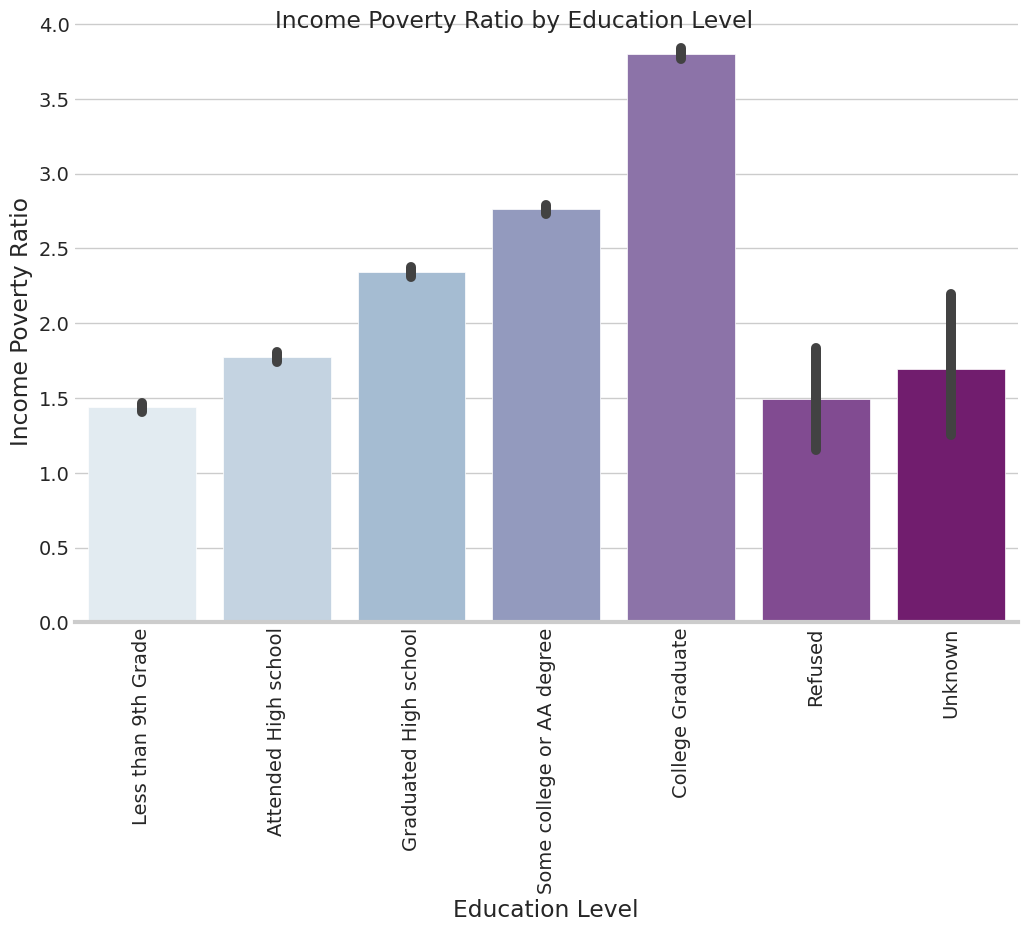

In [ ]:
# Setting intiital style
sns.set_style("whitegrid")

# Plotting
g = sns.catplot(x="Education_Level_Adult", y="Income_Poverty_Ratio", data=dem_df, kind="bar", palette="BuPu",
                height= 7, aspect=1.5)

# Formatting Aesthetics
g.despine(left=True)
g.set_axis_labels("Education Level", "Income Poverty Ratio")
g.fig.suptitle("Income Poverty Ratio by Education Level")
g.set_xticklabels(['Less than 9th Grade','Attended High school','Graduated High school',
                   'Some college or AA degree','College Graduate','Refused','Unknown'])
g.set_xticklabels(rotation=90)


It is clear that increased education is associated with lower instances of poverty. However an interesting trend to note is that we can probably estimate the category of the 'refused' group and impute those values if neccesary. This is due to the fact that a Income Poverty Ratio for those who refused to answer is very similar to those individuals who have only attended high school.

##### **Education Level and Race**

In [ ]:
# Ensuring that this columns are conducive to a categorical analsis by changing their type
dem_df['Education_Level_Adult'] = dem_df['Education_Level_Adult'].astype('category')
dem_df['Race'] = dem_df['Race'].astype('category')


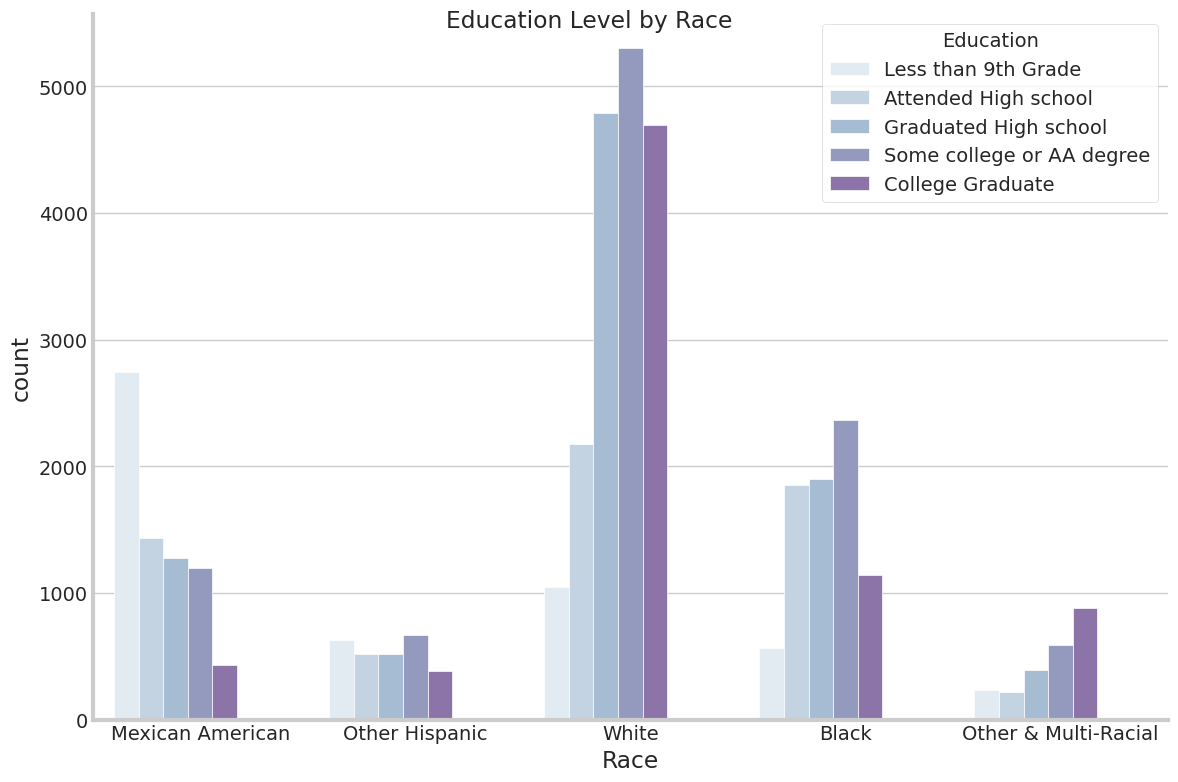

In [ ]:
# Setting intiital style
sns.set_style("whitegrid")

# Plotting
g = sns.catplot(x='Race', hue='Education_Level_Adult', kind='count', data=dem_df, legend= False,
                palette="BuPu", height= 8, aspect=1.5)

# Formatting Aesthetics
plt.legend(title='Education', loc= "best",
           labels=['Less than 9th Grade',
                   'Attended High school',
                   'Graduated High school',
                   'Some college or AA degree',
                   'College Graduate'])

g.set_xticklabels(['Mexican American','Other Hispanic','White',
                   'Black','Other & Multi-Racial'])

g.fig.suptitle("Education Level by Race")



plt.show(g)



Two clear trends are evident in the above visualization, the first being that a majority of the respondents to the survey are white and secondly that post-bacculaurate education relative to early education is much less in hispanic populations. Most striking is the fact that a majority of Hispanic individuals (Mexican American or otherwise) have less than a 9th grade education. Alternatively in the other three racial categories a majority of individuals have at least some form of a college education.

##### **Num Household and Age**

In [ ]:
dem_df['Age'].value_counts()

0.0     3347
2.0     2224
1.0     2163
16.0    1713
14.0    1711
        ... 
79.0     300
81.0     268
82.0     206
84.0     186
83.0     163
Name: Age, Length: 86, dtype: int64

Text(0.5, 0.98, 'Age By People in Household')

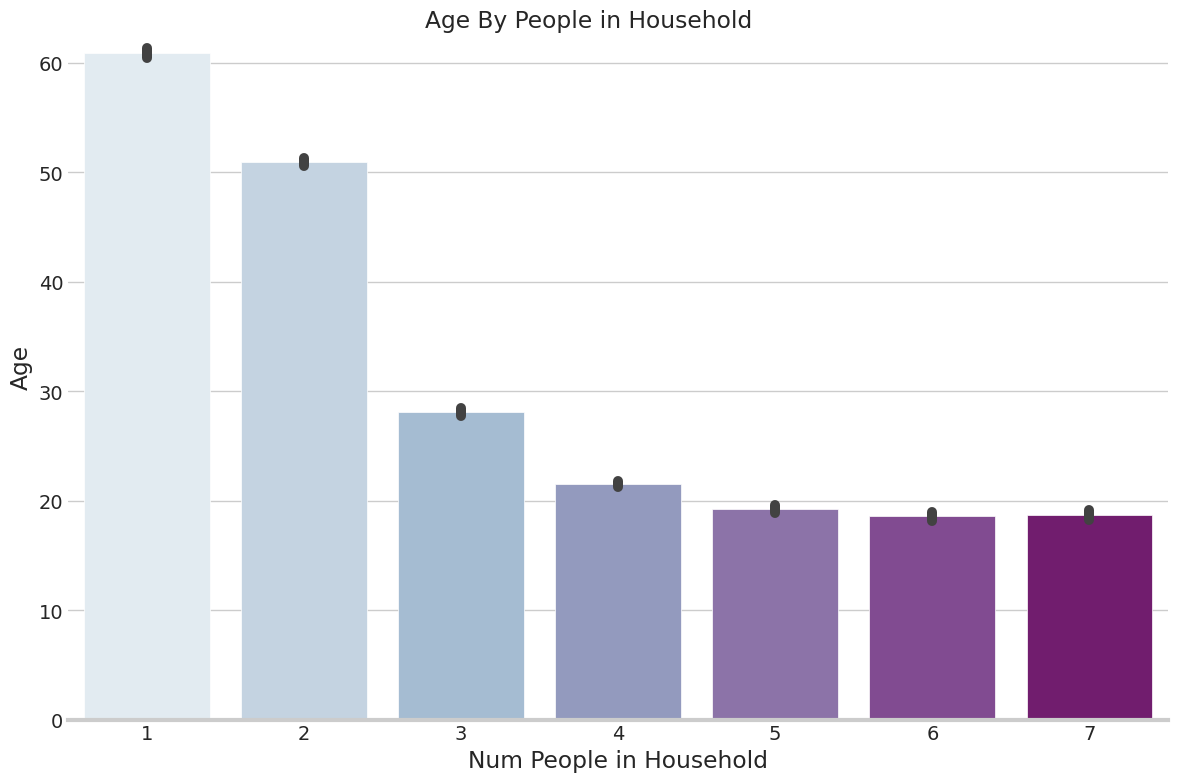

In [ ]:
# Setting Style
sns.set_style("whitegrid")

# Plotting
g = sns.catplot(x="Num_Household", y="Age", data=dem_df, kind="bar", palette="BuPu",
                height= 8, aspect=1.5)

# Aesthetics
g.despine(left=True)
g.set_axis_labels("Num People in Household", "Age")
g.fig.suptitle("Age By People in Household")


This visualization illustrates that there tends to be an inverse relationship between mean household age and household size, meaning that as the average age of household members increases, the household size tends to decrease. This is because older individuals are more likely to live alone or with fewer people, such as a spouse or partner, as their children have left home or they have downsized to a smaller dwelling.

As elderly individuals age, they are more likely to live alone or with fewer people, such as a spouse or partner. Living alone can lead to social isolation and loneliness, which are associated with negative health outcomes such as depression, cognitive decline, and increased mortality risk. Furthermore, living with fewer people may impact the availability of social support and caregiving, which can be critical for elderly individuals with chronic health conditions or disabilities.

### Part II: Relating Demographics and Health

This section seeks to elucidate whether there are any meaningful relationships that exist between demography and certain health conditions which are captured in the NHANES data such as diabetes and Hepatitis-A.

#### Filtering

In this filteric section we are only selecting those columns we need from the main dataframe and changing the column names accordingly to increase the tractability of working with the data.

In [ ]:
df = df_main

In [ ]:
dem_df = df_demographics

In [ ]:
imp_columns_dem = [
    'SEQN',
    "RIAGENDR" ,
    "RIDRETH1" ,
    "RIDAGEYR" ,
    "DMDBORN4" ,
    "DMDCITZN" ,
    "DMDEDUC2" ,
    "DMDMARTL" ,
    "DMDHHSIZ" ,
    "DMDFMSIZ" ,
    "INDHHIN2" ,
    "INDFMIN2" ,
    "INDFMPIR",
]

In [ ]:
dem_names = {
    "RIAGENDR" : "Gender",
    "RIDRETH1" : "Race",
    "RIDAGEYR" : "Age",
    "DMDBORN4" : "Born_In_US",
    "DMDCITZN" : "US_Citizen",
    "DMDEDUC2" : "Education_Level_Adult",
    "DMDMARTL" : "Marital_Status",
    "DMDHHSIZ" : "Num_Household",
    "DMDFMSIZ" : "Num_Family_Members",
    "INDHHIN2" : "Household_Income",
    "INDFMIN2" : "Family_Income",
    "INDFMPIR" : "Income_Poverty_Ratio",
}

In [ ]:
lab_data_cols = [
    'PAQ685',
    'CDQ001',
    'HSD010',
    'DIQ010',
    'LBXGH',
    'LBXHA',
    'LBXB12',
    'LBX4PA',
    'LBXPLP',
    'LBXVIC',
    'LBDVIDMS',
    'WHD010',
    'WHD020'
]

In [ ]:
lab_data_names = {
    'PAQ685' : 'Bad_Air_Quality_Change',
    'CDQ001' : 'Chest_Pain',
    'HSD010' : 'General_Health_Condition',
    'DIQ010' : 'Diabetes',
    'LBXGH' : 'Glycohemoglobin',
    'LBXHA' : 'Hepatitis_A',
    'LBXB12' : 'Vit_B12',
    'LBX4PA' : 'Vit_B6_1',
    'LBXPLP' : 'Vit_B6_2',
    'LBXVIC' : 'Vit_C',
    'LBDVIDMS' : 'Vit_D',
    'WHD010' : 'Height',
    'WHD020' : 'Weight'
}

In [ ]:
df = df[imp_columns_dem + lab_data_cols]
df = df.rename(columns= dem_names)
df = df.rename(columns= lab_data_names)

In [ ]:
df.head()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,...,Diabetes,Glycohemoglobin,Hepatitis_A,Vit_B12,Vit_B6_1,Vit_B6_2,Vit_C,Vit_D,Height,Weight
0,31127,1.0,3.0,0.0,NaN,1.0,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128,2.0,4.0,11.0,NaN,1.0,NaN,NaN,7.0,6.0,...,2.0,NaN,NaN,1190.0,6.7,23.8,1.14,32.6,NaN,NaN
2,31129,1.0,4.0,15.0,NaN,1.0,NaN,5.0,6.0,6.0,...,2.0,5.2,NaN,964.0,31.9,69.8,0.80,49.5,NaN,NaN
3,31130,2.0,3.0,85.0,NaN,1.0,4.0,2.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,120.0
4,31131,2.0,4.0,44.0,NaN,1.0,4.0,1.0,4.0,4.0,...,2.0,6.0,NaN,510.0,11.1,10.0,0.82,37.5,60.0,164.0


In [ ]:
df.columns

Index(['SEQN', 'Gender', 'Race', 'Age', 'Born_In_US', 'US_Citizen',
       'Education_Level_Adult', 'Marital_Status', 'Num_Household',
       'Num_Family_Members', 'Household_Income', 'Family_Income',
       'Income_Poverty_Ratio', 'Bad_Air_Quality_Change', 'Chest_Pain',
       'General_Health_Condition', 'Diabetes', 'Glycohemoglobin',
       'Hepatitis_A', 'Vit_B12', 'Vit_B6_1', 'Vit_B6_2', 'Vit_C', 'Vit_D',
       'Height', 'Weight'],
      dtype='object')

In [ ]:
df.describe()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,...,Diabetes,Glycohemoglobin,Hepatitis_A,Vit_B12,Vit_B6_1,Vit_B6_2,Vit_C,Vit_D,Height,Weight
count,252751.000000,208365.000000,208365.000000,208365.000000,9756.000000,208307.000000,122249.000000,128737.000000,208365.000000,177239.000000,...,243462.000000,167765.000000,23024.000000,12926.000000,142504.000000,142520.000000,21319.000000,24407.000000,153057.000000,153412.000000
mean,52557.655499,1.502095,2.782473,33.299105,1.259225,1.101134,3.286595,2.529335,3.713580,3.544733,...,1.938804,5.645554,1.394110,640.490871,80.203663,72.779757,0.998778,58.448375,205.948353,347.768056
std,25094.570837,0.499997,1.156086,25.483922,2.069807,0.365005,1.308485,2.476690,1.731067,1.768425,...,0.348832,1.008278,0.493886,964.802149,434.687435,83.257125,0.500784,21.591623,1166.909211,3083.857447
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,50.000000,0.500000,2.000000,0.010000,9.100000,39.000000,50.000000
25%,42967.000000,1.000000,2.000000,10.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,5.200000,1.000000,390.000000,15.400000,32.100000,0.670000,43.400000,63.000000,145.000000
50%,47325.000000,2.000000,3.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000,3.000000,...,2.000000,5.400000,1.000000,538.000000,23.100000,51.300000,1.000000,56.800000,66.000000,170.000000
75%,53114.500000,2.000000,4.000000,55.000000,1.000000,1.000000,4.000000,5.000000,5.000000,5.000000,...,2.000000,5.800000,2.000000,748.000000,42.000000,82.300000,1.290000,71.300000,70.000000,200.000000
max,124822.000000,2.000000,5.000000,85.000000,99.000000,9.000000,9.000000,99.000000,7.000000,7.000000,...,9.000000,18.800000,3.000000,70200.000000,18800.000000,2330.000000,14.600000,198.000000,9999.000000,99999.000000


#### Imputation

In [ ]:
df.isna().sum()

SEQN                             0
Gender                       44386
Race                         44386
Age                          44386
Born_In_US                  242995
US_Citizen                   44444
Education_Level_Adult       130502
Marital_Status              124014
Num_Household                44386
Num_Family_Members           75512
Household_Income             86908
Family_Income                87170
Income_Poverty_Ratio         61964
Bad_Air_Quality_Change      148188
Chest_Pain                  160795
General_Health_Condition    102617
Diabetes                      9289
Glycohemoglobin              84986
Hepatitis_A                 229727
Vit_B12                     239825
Vit_B6_1                    110247
Vit_B6_2                    110231
Vit_C                       231432
Vit_D                       228344
Height                       99694
Weight                       99339
dtype: int64

In [ ]:
null_percent = df.isnull().mean()

# Select columns with over 70% null values
cols_to_drop = null_percent[null_percent > 0.70].index
cols_to_drop

Index(['Born_In_US', 'Hepatitis_A', 'Vit_B12', 'Vit_C', 'Vit_D'], dtype='object')

#### Correlation

Much like the previous correlation heatmap but now looks at a larger set of pairwise correlations in order to potentially elucidate whether there is any correlation between these factors and particular health conditions.

<Axes: >

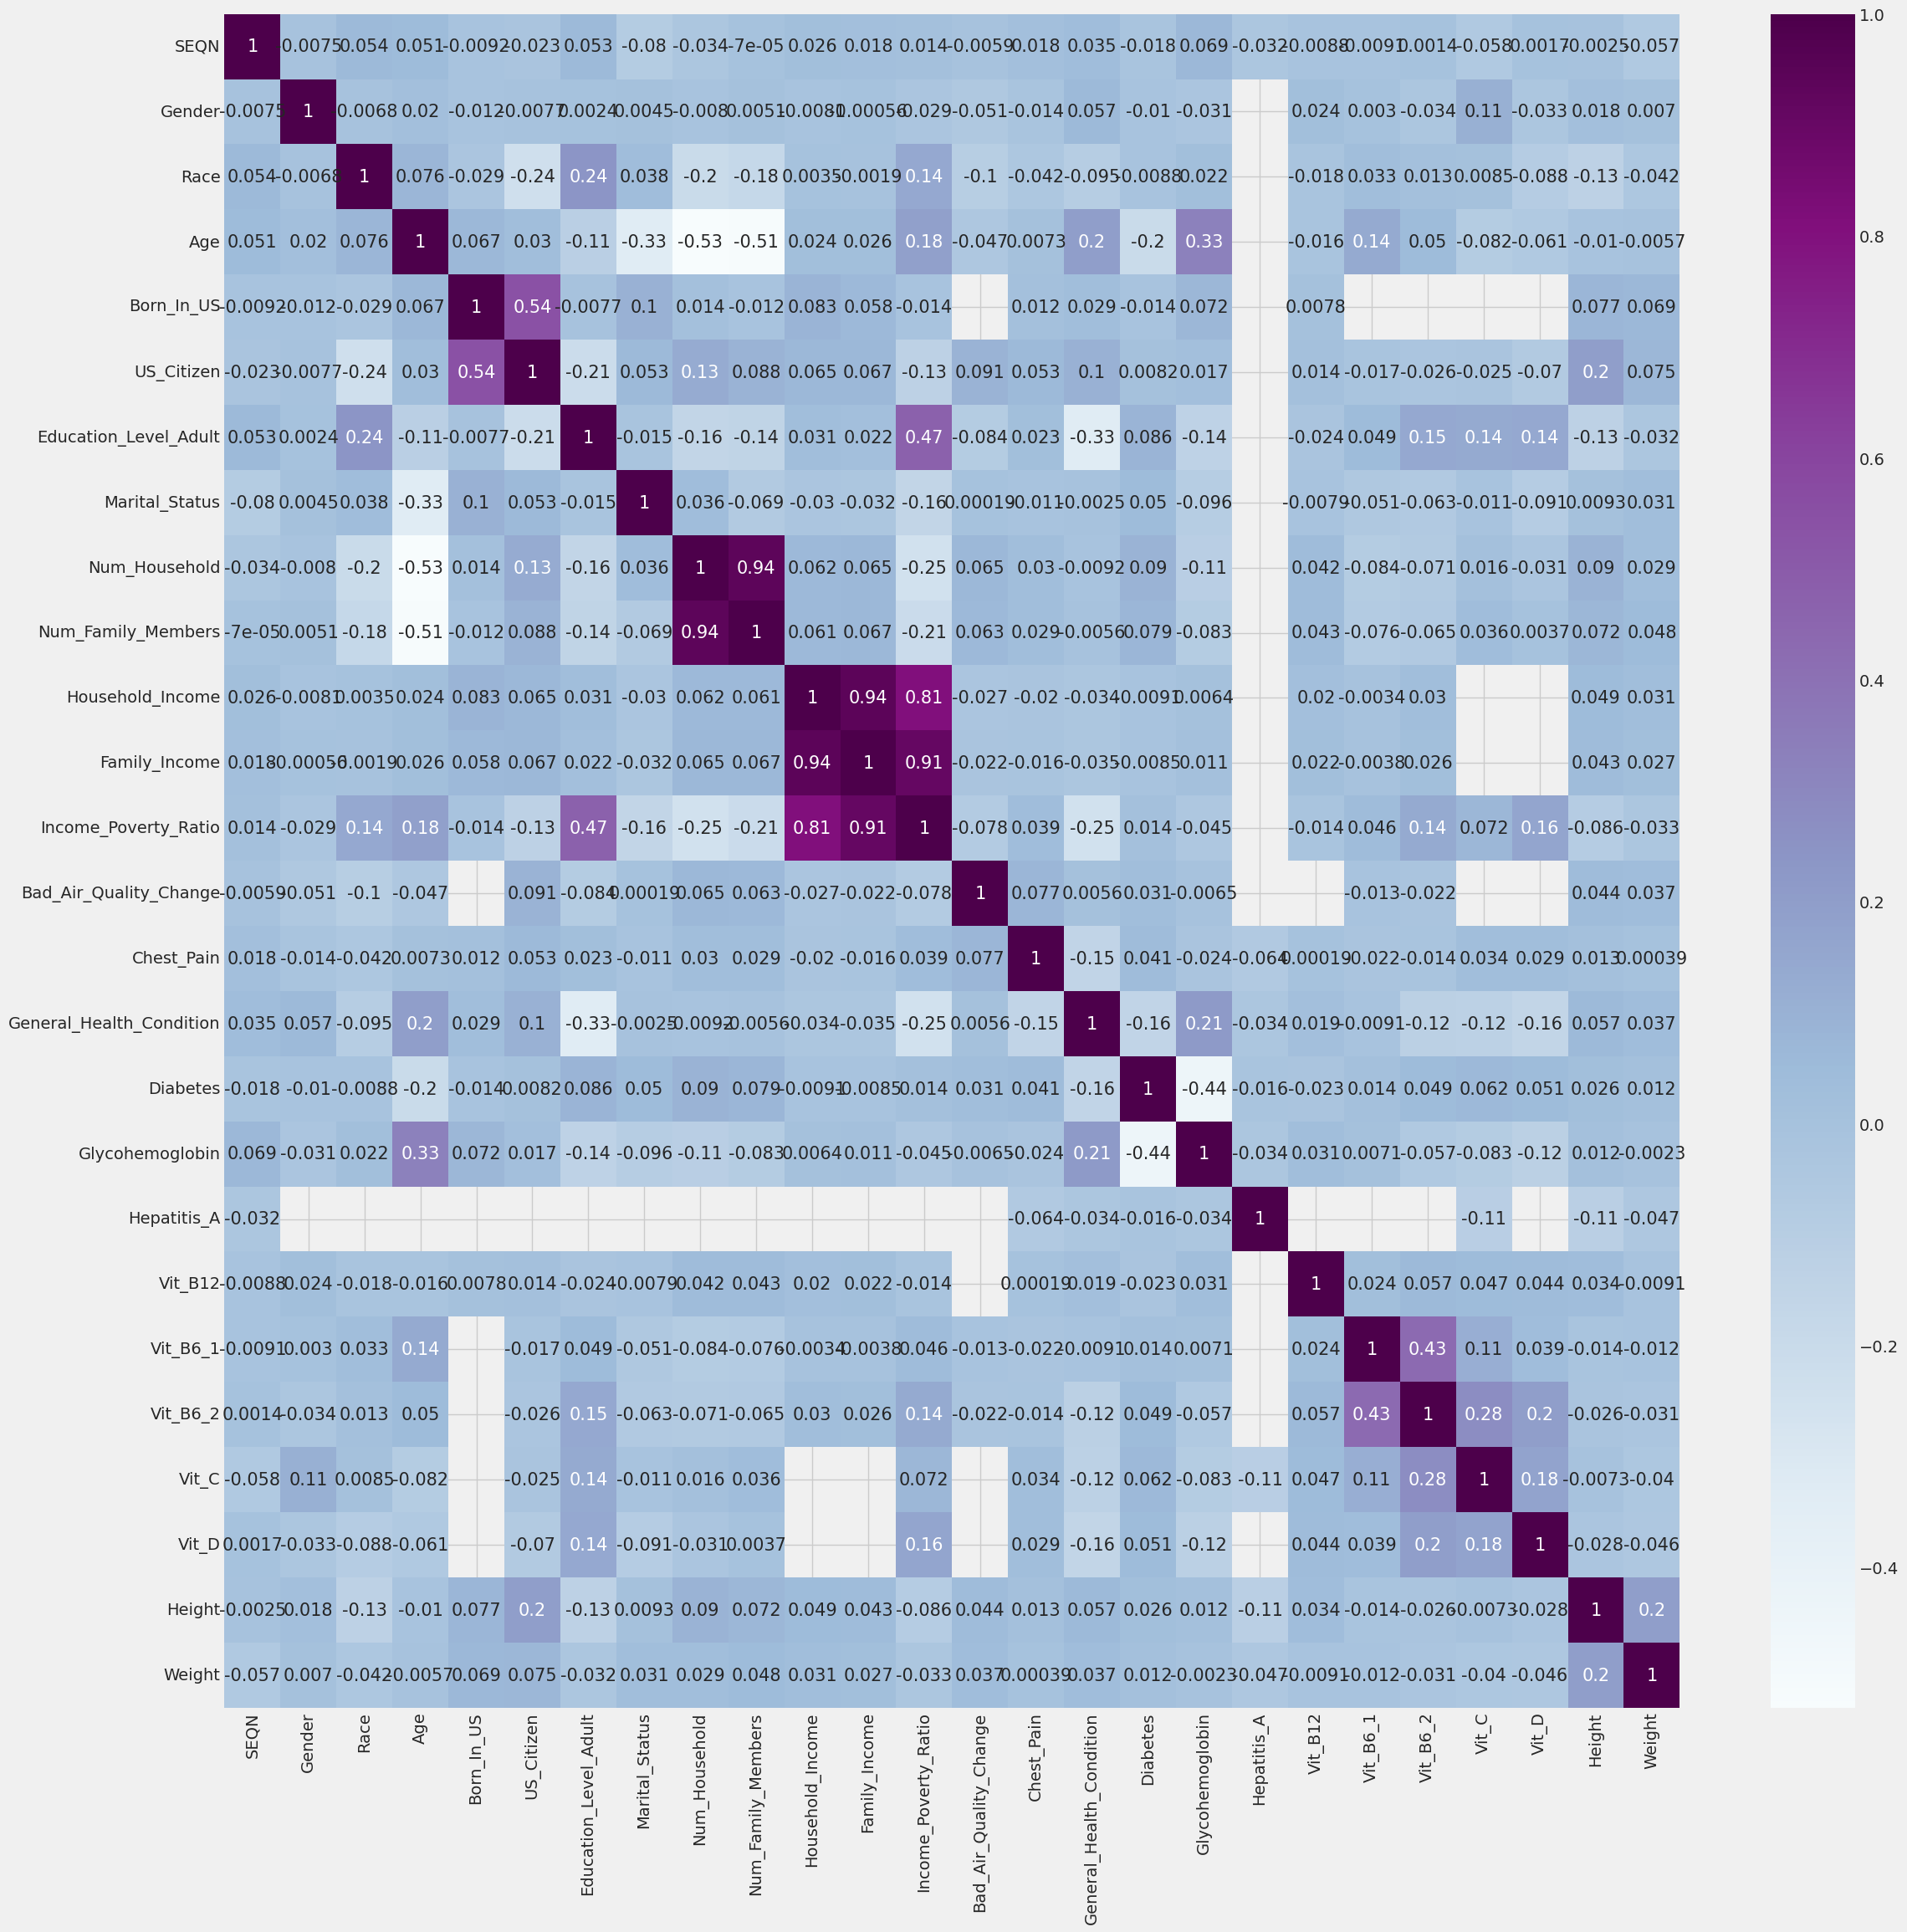

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Style setting
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# This will display the correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size":15})

Based on this plot of correlation it seems the variables we should model on are *Glycohemoglobin, Vitamin B6, General Health Condition, Vitamin C, and Vitamin D*. But before we do so let us explore one of these varaible a little bit more closely, specifically glycohemoglobin which is instrinsically correlated with a major disease of interest, Diabetes.


> As an aside the presence of blank spots in the heatmap is indicative of incomplete data within each tuple. For example it seems that barely any tuples have both a Hepatitis and Race columns that are noth non-null.



## EDA II: Presentation of Diabetes and Demographic Connections

Now that we have enumerated potential correlations between demography and health. One of the first tasks in the EDA is to get a better understanding of the size of our data set and the amount of tractable/useful information that we can extract from it. The below code snippet is mean to enumerate the size of the aggregated, main data set prior to cleaning.

In [ ]:
# Shape method return number of columns and rows
print('The number of rows in the entire dataset is: '+ str(df_main.shape[0]))
print('The number of columns in the entire dataset is: '+ str(df_main.shape[1]))
df_main.info()

The number of rows in the entire dataset is: 252751
The number of columns in the entire dataset is: 906
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252751 entries, 0 to 252750
Columns: 906 entries, # to WHQ200
dtypes: float64(904), int64(1), object(1)
memory usage: 1.7+ GB


That is an extremely large amount of columns but this is not outside the scope of what we expected becuase we simply have such a rich variety of data from the HANES dataset from which we compiled the aggregate data. Therefore, in order to perform any sort of EDA we must limit our analysis to some subset of related columns. We will start by considering diabetes levels among the respondents in the dataset:

### Calculating Diabetic Status


The columns that we will consider in this first set of analysis are those columns that correspond to the age, gender, glycohemoglobin, and race of participants in the NHANES study.

In [ ]:
# Columns of Interest
columns = ['SEQN', 'LBXGH', 'RIDAGEYR', 'RIAGENDR']

# Renaming the columns to ensure more clarity in the later analysis
rename = {
    'SEQN' : 'ID',
    'LBXGH' : 'Glycohemoglobin',
    'RIDAGEYR' : 'Age',
    'RIAGENDR' : 'Gender'
}

# Creating the df of interest and ensuring that we have no rows with null values
# which could complicate visualization
glycohemoglobin = df_main[columns].rename(columns=rename).dropna()
glycohemoglobin.info()


#Specifying a new column that defines the presentation of diabetes depending on
# A1C (glycohemoglobin) level. This involves a mapping of these values to 3 categories

def diabeticStatus(A1C) :
  if A1C < 5.7 :
    return 'ND'
  elif 5.7 <= A1C < 6.5 :
    return 'PD'
  else :
    return 'D'


glycohemoglobin['Diabetic Status'] = glycohemoglobin["Glycohemoglobin"].apply(diabeticStatus)
glycohemoglobin[['Glycohemoglobin', 'Diabetic Status']].head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139014 entries, 2 to 208363
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               139014 non-null  int64  
 1   Glycohemoglobin  139014 non-null  float64
 2   Age              139014 non-null  float64
 3   Gender           139014 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 5.3 MB


,Glycohemoglobin,Diabetic Status
2,5.2,ND
4,6.0,PD
5,7.1,D
6,4.7,ND
7,5.9,PD


###Analyzing Glycohemoglobin and Diabetic Status Distributions




Below we explore the distrubution of glycohemoglobin level which is a numerical quantity and later we illustrate an alternative way of looking at the same distribution by considering the categorization of these quantities.

Text(0.5, 1.0, 'Diabetes Presentation')

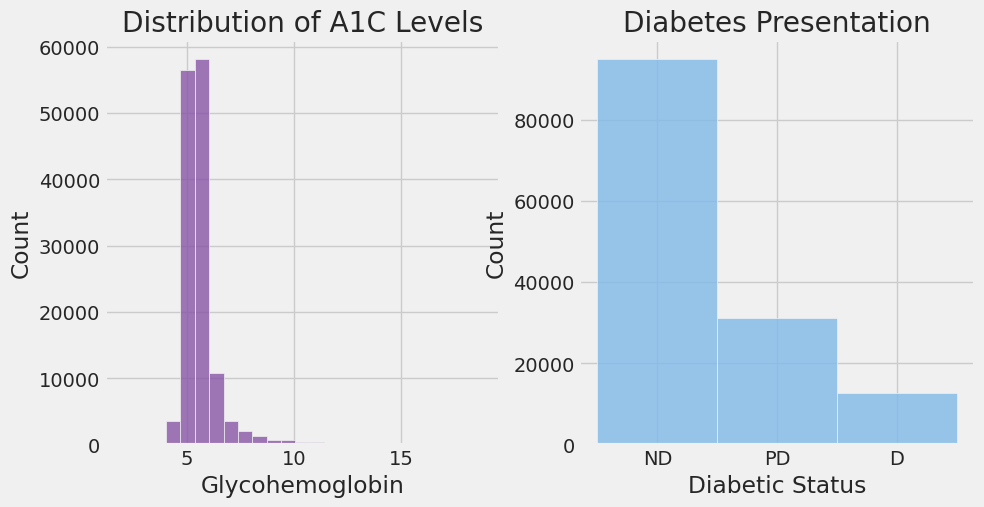

In [ ]:
# First we define the underlying structure of the plot so that we are able to visualize these two plots side-by-side
# as weel as specify a color scheme
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.set_palette(palette='BuPu')



# Actually displaying the plots, have to play around with the paramaters
sns.histplot(data=glycohemoglobin, x="Glycohemoglobin", bins=25, color='#8856a7', ax=ax1, alpha=.8)
sns.histplot(data=glycohemoglobin, x="Diabetic Status", ax=ax2, color = '#80b9e8', alpha=.8)
# fig.tight_layout(pad=5.0)


# Adding plot titles
ax1.set_title('Distribution of A1C Levels')
ax2.set_title('Diabetes Presentation')

It is clear from the above visualizations that a vast majority of individuals in the sampled population do not have diabetes, however a particularly startling observation is just how many people are actually prediabetic. We will now explore the links between prediabetes and age/gender in order to better understand the issue.

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Relationships between Age and Diabetes

Text(0.5, 1.0, 'A1C Level vs. Age')

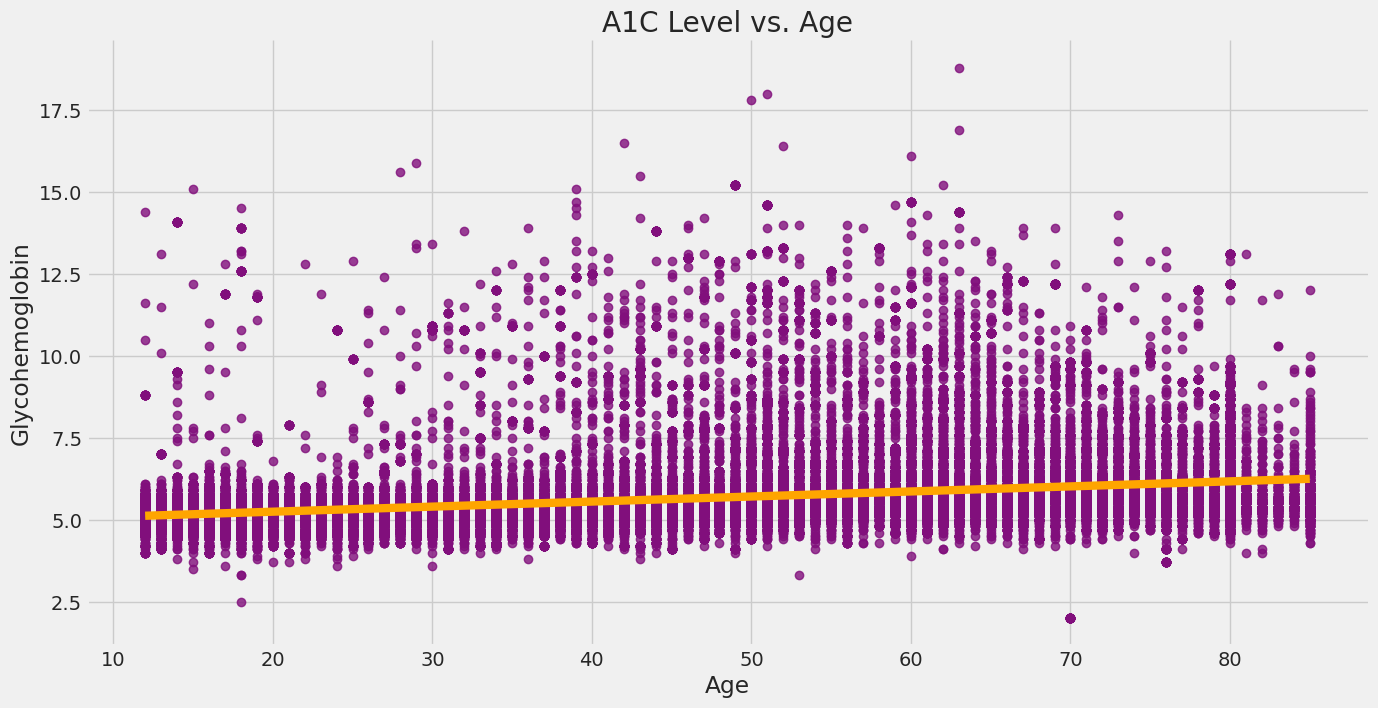

In [ ]:
import statsmodels.api as sm

# First we will plot the bivariate-distribution of age-vs-A1C level to get a better understanding of which age groups
# are disproportionately presenting with diabetes.
g = sns.lmplot(
    data=glycohemoglobin,
    x="Age",
    y="Glycohemoglobin",
    height=7,
    aspect=2,
    line_kws={"color": "orange"},
    scatter_kws={"color": "#810f7c"}
)

# adjust figure size and spacing, and adding title
plt.title("A1C Level vs. Age")

While it seems like there is no clear discernable difference between glycohemoglobin levels at different ages, interpolating a line-of-best fit suggests that increases in age are linked with a subtle increase in A1C levels. This provides further direction into our EDA becuase it suggests that diabetes disproportionately affects older individuals. However to test this hypothesis we will examine the distribution of diabetes presentation across different age groups.

In [ ]:
# This cell will be meant to add categorical age values so that we can observe the distribution of
# diabetes presentation sperataley across different age groups.

# Funcition to map age to a group
def ageGroup(age) :
  if age < 0:
        return 'Invalid age'
  elif age < 18:
      return 'Child'
  elif age < 30:
      return 'Young Adult'
  elif age < 50:
      return 'Adult'
  elif age < 65:
      return 'Senior'
  elif age < 100:
      return 'Elderly'
  else:
      return 'Centenarian'

glycohemoglobin['Age Group'] = glycohemoglobin["Age"].apply(ageGroup)
glycohemoglobin.info()
glycohemoglobin.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139014 entries, 2 to 208363
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               139014 non-null  int64  
 1   Glycohemoglobin  139014 non-null  float64
 2   Age              139014 non-null  float64
 3   Gender           139014 non-null  float64
 4   Diabetic Status  139014 non-null  object 
 5   Age Group        139014 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.4+ MB


,ID,Glycohemoglobin,Age,Gender,Diabetic Status,Age Group
2,31129,5.2,15.0,1.0,ND,Child
4,31131,6.0,44.0,2.0,PD,Adult
5,31132,7.1,70.0,1.0,D,Elderly
6,31133,4.7,16.0,2.0,ND,Child
7,31134,5.9,73.0,1.0,PD,Elderly


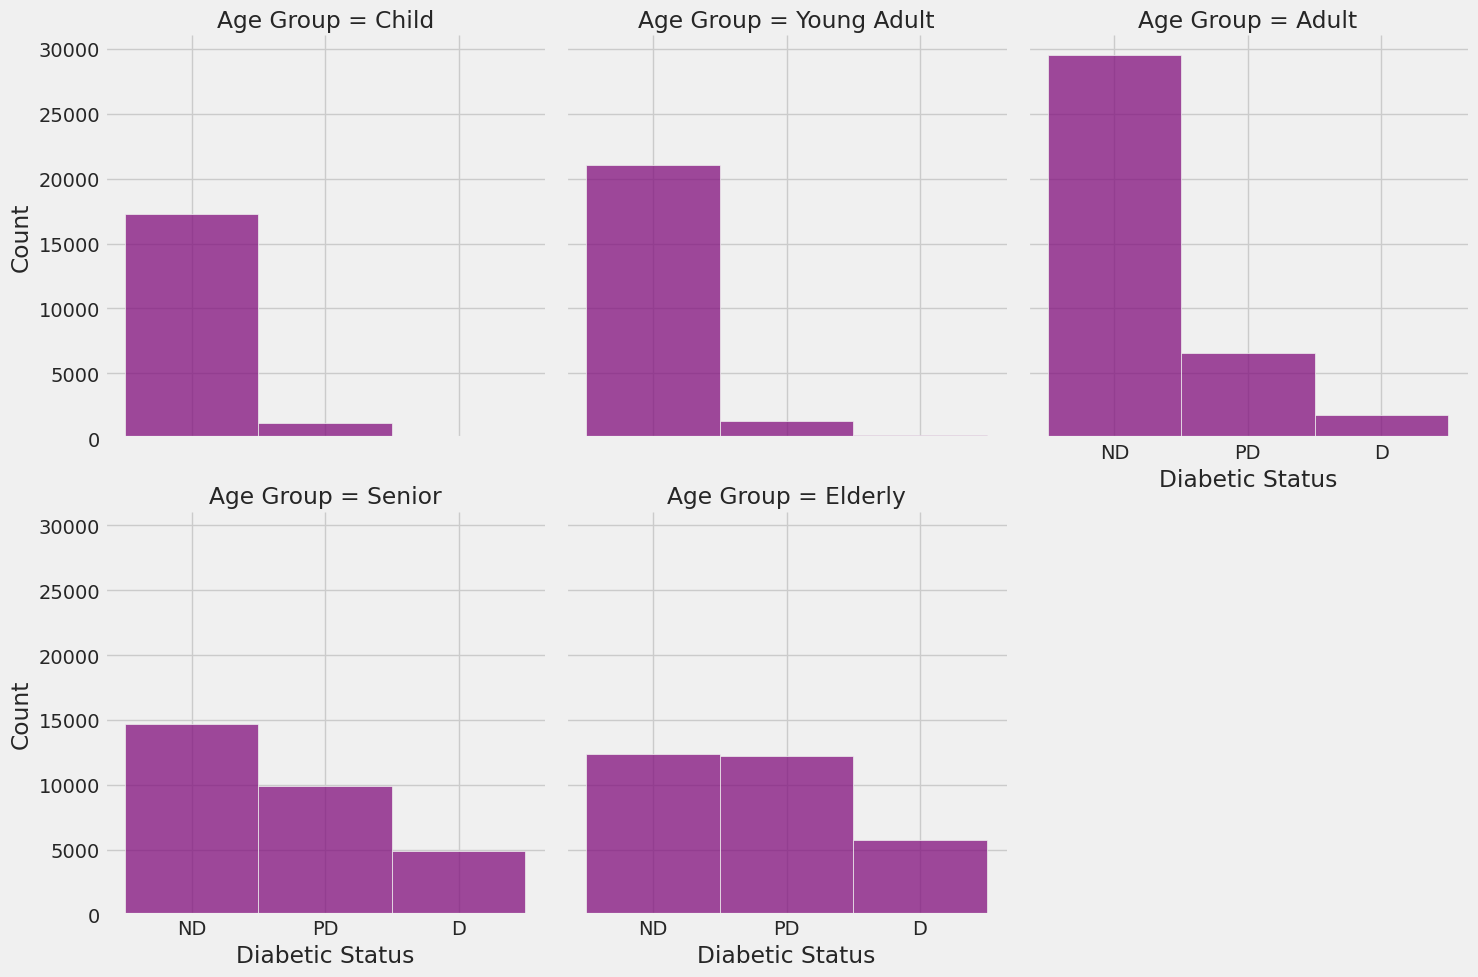

In [ ]:
# This cell focuses on the multiplot analysis of presentation at different ages

# Create a FacetGrid with subplots for each age group
g = sns.displot(glycohemoglobin,x='Diabetic Status', col='Age Group', col_order=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'], col_wrap=3,
                color='#810f7c')

#For later:
  # * Modify Spacing
  # * Check to see if I can make the various statuses different colors
  # * Structure subplots assymetrically
  # * Impose an order of subplots to show chronology



The above plots illustrate a startiling transition between the adult and elderly population in which the proportion of prediabetic individuals realtive to non-diabetic increases massively. This suggests potential demographics targets for diabetic preventation/education, as well as potential sites of scientific research in order to elucidate the mechanism of the relationship if such a causative one does exist.


###Relationships between Gender and Diabetes

The last worthwhile relationship to explore would potentially be the relationship between gender and diabetes which would help us better undersatnd whether gender can function as a predictive feature in our later modeling phase.

In [ ]:
# Converting the numeric gender value to 'Male' vs. 'Female'

# Funcition to map gender number to a group
def gender(value) :
  if  value == 1:
        return 'Male'
  elif value == 2:
      return 'Female'

glycohemoglobin['Gender'] = glycohemoglobin["Gender"].apply(gender)
glycohemoglobin.info()
glycohemoglobin.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139014 entries, 2 to 208363
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               139014 non-null  int64  
 1   Glycohemoglobin  139014 non-null  float64
 2   Age              139014 non-null  float64
 3   Gender           139014 non-null  object 
 4   Diabetic Status  139014 non-null  object 
 5   Age Group        139014 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 11.5+ MB


,ID,Glycohemoglobin,Age,Gender,Diabetic Status,Age Group
2,31129,5.2,15.0,Male,ND,Child
4,31131,6.0,44.0,Female,PD,Adult
5,31132,7.1,70.0,Male,D,Elderly
6,31133,4.7,16.0,Female,ND,Child
7,31134,5.9,73.0,Male,PD,Elderly


<Axes: xlabel='Diabetic Status', ylabel='Count'>

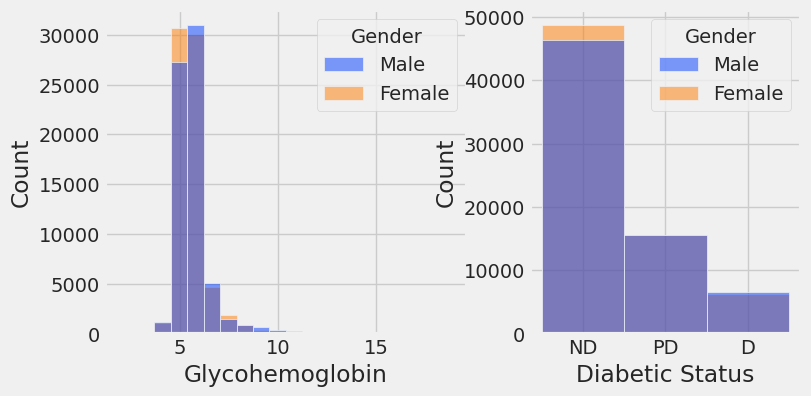

In [ ]:
# First we define the underlying structure of the plot so that we are able to visualize these two plots side-by-side
# as weel as specify a color scheme
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.set_palette("bright")



# Actually displaying the plots, have to play around with the paramaters
sns.histplot(data=glycohemoglobin, x="Glycohemoglobin", hue='Gender', ax=axs[0], bins=20)
sns.histplot(data=glycohemoglobin, x="Diabetic Status", hue='Gender', ax=axs[1])



It is clear from the above visualization that the presentation of diabetes is not differentially correlated with gender. This is evidenced by the fact that the distribution of diabetes and A1C levels does not differ significantly between the two assigned at birth genders.

As a summary of this analysis we plot all pairwise combinations of the various demographic factors and diabetes parameters.

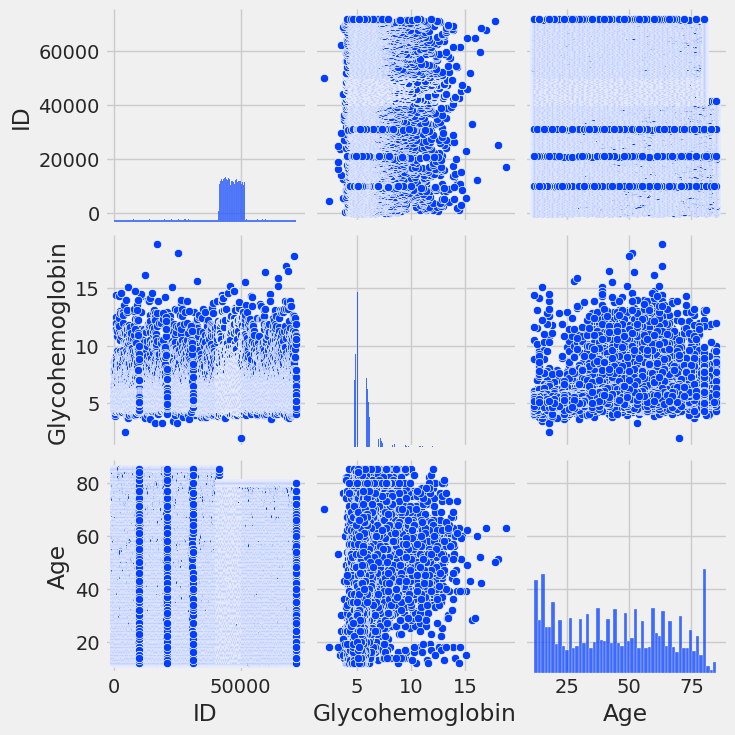

In [ ]:
sns.pairplot(glycohemoglobin)


# 4. Modeling


## Read In Data

The section below is semantics to read in and rename data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
df_1 = df_main

In [ ]:
dem_df = pd.read_csv('/content/drive/Shareddrives/CIS 545 Final Proj/CSV Files/demographic_variables___sample_weights.csv')

In [ ]:
imp_columns_dem = [
    'SEQN',
    "RIAGENDR" ,
    "RIDRETH1" ,
    "RIDAGEYR" ,
    "DMDBORN4" ,
    "DMDCITZN" ,
    "DMDEDUC2" ,
    "DMDMARTL" ,
    "DMDHHSIZ" ,
    "DMDFMSIZ" ,
    "INDHHIN2" ,
    "INDFMIN2" ,
    "INDFMPIR",
]

In [ ]:
dem_names = {
    "RIAGENDR" : "Gender",
    "RIDRETH1" : "Race",
    "RIDAGEYR" : "Age",
    "DMDBORN4" : "Born_In_US",
    "DMDCITZN" : "US_Citizen",
    "DMDEDUC2" : "Education_Level_Adult",
    "DMDMARTL" : "Marital_Status",
    "DMDHHSIZ" : "Num_Household",
    "DMDFMSIZ" : "Num_Family_Members",
    "INDHHIN2" : "Household_Income",
    "INDFMIN2" : "Family_Income",
    "INDFMPIR" : "Income_Poverty_Ratio",
}

In [ ]:
lab_data_cols = [
    'PAQ685',
    'CDQ001',
    'HSD010',
    'DIQ010',
    'LBXGH',
    'LBXHA',
    'LBXB12',
    'LBX4PA',
    'LBXPLP',
    'LBXVIC',
    'LBDVIDMS',
    'WHD010',
    'WHD020'
    ]

In [ ]:
lab_data_names = {
    'PAQ685' : 'Bad_Air_Quality_Change',
    'CDQ001' : 'Chest_Pain',
    'HSD010' : 'General_Health_Condition',
    'DIQ010' : 'Diabetes',
    'LBXGH' : 'Glycohemoglobin',
    'LBXHA' : 'Hepatitis_A',
    'LBXB12' : 'Vit_B12',
    'LBX4PA' : 'Vit_B6_1',
    'LBXPLP' : 'Vit_B6_2',
    'LBXVIC' : 'Vit_C',
    'LBDVIDMS' : 'Vit_D',
    'WHD010' : 'Height',
    'WHD020' : 'Weight'
}

In [ ]:
df_1 = df_1[imp_columns_dem + lab_data_cols]
df_1 = df_1.rename(columns= dem_names)
df_1 = df_1.rename(columns= lab_data_names)

In [ ]:
df_1.head()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,...,Diabetes,Glycohemoglobin,Hepatitis_A,Vit_B12,Vit_B6_1,Vit_B6_2,Vit_C,Vit_D,Height,Weight
0,31127,1.0,3.0,0.0,NaN,1.0,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128,2.0,4.0,11.0,NaN,1.0,NaN,NaN,7.0,6.0,...,2.0,NaN,NaN,1190.0,6.7,23.8,1.14,32.6,NaN,NaN
2,31129,1.0,4.0,15.0,NaN,1.0,NaN,5.0,6.0,6.0,...,2.0,5.2,NaN,964.0,31.9,69.8,0.80,49.5,NaN,NaN
3,31130,2.0,3.0,85.0,NaN,1.0,4.0,2.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,120.0
4,31131,2.0,4.0,44.0,NaN,1.0,4.0,1.0,4.0,4.0,...,2.0,6.0,NaN,510.0,11.1,10.0,0.82,37.5,60.0,164.0


In [ ]:
df_1.columns

Index(['SEQN', 'Gender', 'Race', 'Age', 'Born_In_US', 'US_Citizen',
       'Education_Level_Adult', 'Marital_Status', 'Num_Household',
       'Num_Family_Members', 'Household_Income', 'Family_Income',
       'Income_Poverty_Ratio', 'Bad_Air_Quality_Change', 'Chest_Pain',
       'General_Health_Condition', 'Diabetes', 'Glycohemoglobin',
       'Hepatitis_A', 'Vit_B12', 'Vit_B6_1', 'Vit_B6_2', 'Vit_C', 'Vit_D',
       'Height', 'Weight'],
      dtype='object')

In [ ]:
df_1.describe()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,...,Diabetes,Glycohemoglobin,Hepatitis_A,Vit_B12,Vit_B6_1,Vit_B6_2,Vit_C,Vit_D,Height,Weight
count,252751.000000,208365.000000,208365.000000,208365.000000,9756.000000,208307.000000,122249.000000,128737.000000,208365.000000,177239.000000,...,243462.000000,167765.000000,23024.000000,12926.000000,142504.000000,142520.000000,21319.000000,24407.000000,153057.000000,153412.000000
mean,52557.655499,1.502095,2.782473,33.299105,1.259225,1.101134,3.286595,2.529335,3.713580,3.544733,...,1.938804,5.645554,1.394110,640.490871,80.203663,72.779757,0.998778,58.448375,205.948353,347.768056
std,25094.570837,0.499997,1.156086,25.483922,2.069807,0.365005,1.308485,2.476690,1.731067,1.768425,...,0.348832,1.008278,0.493886,964.802149,434.687435,83.257125,0.500784,21.591623,1166.909211,3083.857447
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,50.000000,0.500000,2.000000,0.010000,9.100000,39.000000,50.000000
25%,42967.000000,1.000000,2.000000,10.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,5.200000,1.000000,390.000000,15.400000,32.100000,0.670000,43.400000,63.000000,145.000000
50%,47325.000000,2.000000,3.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000,3.000000,...,2.000000,5.400000,1.000000,538.000000,23.100000,51.300000,1.000000,56.800000,66.000000,170.000000
75%,53114.500000,2.000000,4.000000,55.000000,1.000000,1.000000,4.000000,5.000000,5.000000,5.000000,...,2.000000,5.800000,2.000000,748.000000,42.000000,82.300000,1.290000,71.300000,70.000000,200.000000
max,124822.000000,2.000000,5.000000,85.000000,99.000000,9.000000,9.000000,99.000000,7.000000,7.000000,...,9.000000,18.800000,3.000000,70200.000000,18800.000000,2330.000000,14.600000,198.000000,9999.000000,99999.000000


In [ ]:
df_1.head()

,SEQN,Gender,Race,Age,Born_In_US,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Num_Family_Members,...,Diabetes,Glycohemoglobin,Hepatitis_A,Vit_B12,Vit_B6_1,Vit_B6_2,Vit_C,Vit_D,Height,Weight
0,31127,1.0,3.0,0.0,NaN,1.0,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128,2.0,4.0,11.0,NaN,1.0,NaN,NaN,7.0,6.0,...,2.0,NaN,NaN,1190.0,6.7,23.8,1.14,32.6,NaN,NaN
2,31129,1.0,4.0,15.0,NaN,1.0,NaN,5.0,6.0,6.0,...,2.0,5.2,NaN,964.0,31.9,69.8,0.80,49.5,NaN,NaN
3,31130,2.0,3.0,85.0,NaN,1.0,4.0,2.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,120.0
4,31131,2.0,4.0,44.0,NaN,1.0,4.0,1.0,4.0,4.0,...,2.0,6.0,NaN,510.0,11.1,10.0,0.82,37.5,60.0,164.0


## Drop Correlated columns

Based on our EDA above, to remove correlated pairs, we should drop 'Num_Family_Members' and 'Family Income'. Removing these two columns will get rid of all highly correlated pairs (columns with correlation coeff > 75%)

In [ ]:
df = df_1.drop(columns=['Num_Family_Members', 'Family_Income'])

## Setting Up Glycohemoglobin Modeling

In [ ]:
target = 'Glycohemoglobin'

In [ ]:
df_glyco = df.dropna(subset=[target])

In [ ]:
len(df.index)

252751

In [ ]:
len(df_glyco.index)

167765

### Explore Target

We can explore the target variable of glycohemoglobin percentage a little bit before diving into modeling

In [ ]:
df_glyco[target].value_counts()

5.4     15689
5.3     15668
5.5     14462
5.2     14461
5.6     12230
        ...  
2.5         1
18.8        1
16.1        1
18.0        1
3.0         1
Name: Glycohemoglobin, Length: 137, dtype: int64

<Axes: xlabel='Glycohemoglobin', ylabel='Count'>

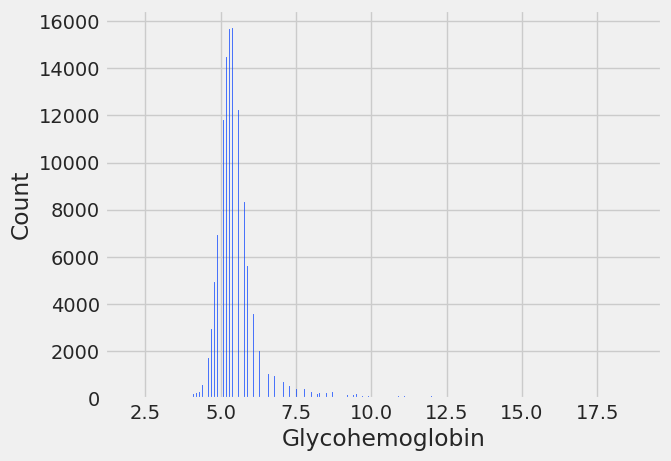

In [ ]:
sns.histplot(df_glyco[target])


### Drop outliers

The Graph above looks a little big...we should drop outliers above that could throw off our model and can harm training for real-world applicability. We do this below with some statistics, namely making sure each rows z score doesnt deviate too much from the columns distribution

In [ ]:
from scipy import stats

df_glyco = df_glyco[(np.abs(stats.zscore(df_glyco[target])) < 4)]

<Axes: xlabel='Glycohemoglobin', ylabel='Count'>

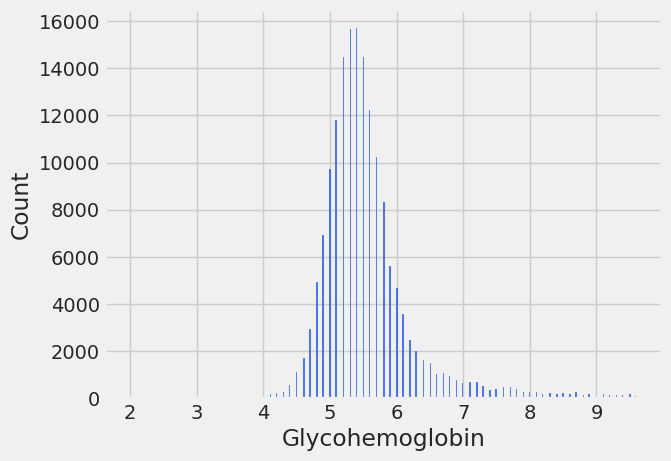

In [ ]:
sns.histplot(df_glyco[target])

### Drop Columns That are more than 50% empty

Pretty self explanatory here, if a column is more than 50% empty, imputing data would likely do more harm than good, so we can just remove these columns and model around other variables

In [ ]:
df_glyco.isna().sum()

SEQN                             0
Gender                       28265
Race                         28265
Age                          28265
Born_In_US                  159375
US_Citizen                   28299
Education_Level_Adult        52783
Marital_Status               46998
Num_Household                28265
Household_Income             55075
Income_Poverty_Ratio         39669
Bad_Air_Quality_Change       67985
Chest_Pain                   80608
General_Health_Condition     24369
Diabetes                         3
Glycohemoglobin                  0
Hepatitis_A                 147159
Vit_B12                     154390
Vit_B6_1                     55214
Vit_B6_2                     55194
Vit_C                       146857
Vit_D                       145795
Height                       25061
Weight                       24770
dtype: int64

In [ ]:
null_percent = df_glyco.isnull().mean()

# Select columns with over 50% null values
cols_to_drop = null_percent[null_percent > 0.5].index

cols_to_drop

Index(['Born_In_US', 'Hepatitis_A', 'Vit_B12', 'Vit_C', 'Vit_D'], dtype='object')

In [ ]:
# Drop the columns
df_glyco = df_glyco.drop(cols_to_drop, axis=1)

In [ ]:
df_glyco.head()

,SEQN,Gender,Race,Age,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Household_Income,Income_Poverty_Ratio,Bad_Air_Quality_Change,Chest_Pain,General_Health_Condition,Diabetes,Glycohemoglobin,Vit_B6_1,Vit_B6_2,Height,Weight
2,31129,1.0,4.0,15.0,1.0,NaN,5.0,6.0,NaN,2.71,NaN,NaN,3.0,2.0,5.2,31.9,69.8,NaN,NaN
4,31131,2.0,4.0,44.0,1.0,4.0,1.0,4.0,NaN,4.65,NaN,2.0,3.0,2.0,6.0,11.1,10.0,60.0,164.0
5,31132,1.0,3.0,70.0,1.0,5.0,1.0,2.0,NaN,5.00,NaN,2.0,2.0,1.0,7.1,98.4,278.0,68.0,154.0
6,31133,2.0,4.0,16.0,1.0,NaN,5.0,3.0,NaN,5.00,NaN,NaN,4.0,2.0,4.7,15.9,24.6,62.0,100.0
7,31134,1.0,3.0,73.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,2.0,3.0,2.0,5.9,21.9,29.3,72.0,215.0


### Imputation

The commented out portion below represents our attempt at KNN imputation, but this takes an extremely long time to run, and as we are able to generate fine models with mean imputation, we can just take that route.

In [ ]:
# from sklearn.impute import KNNImputer

# # impute missing values using KNNImputer
# imputer = KNNImputer(n_neighbors=3)
# df_glyco_imputed = pd.DataFrame(imputer.fit_transform(df_glyco), columns=df_glyco.columns)

# df_glyco_imputed.head()

In [ ]:
# Mean imputation

df_glyco = df_glyco.fillna(df_glyco.mean().round())

In [ ]:
df_glyco.head()

,SEQN,Gender,Race,Age,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Household_Income,Income_Poverty_Ratio,Bad_Air_Quality_Change,Chest_Pain,General_Health_Condition,Diabetes,Glycohemoglobin,Vit_B6_1,Vit_B6_2,Height,Weight
2,31129,1.0,4.0,15.0,1.0,3.0,5.0,6.0,11.0,2.71,2.0,2.0,3.0,2.0,5.2,31.9,69.8,202.0,332.0
4,31131,2.0,4.0,44.0,1.0,4.0,1.0,4.0,11.0,4.65,2.0,2.0,3.0,2.0,6.0,11.1,10.0,60.0,164.0
5,31132,1.0,3.0,70.0,1.0,5.0,1.0,2.0,11.0,5.00,2.0,2.0,2.0,1.0,7.1,98.4,278.0,68.0,154.0
6,31133,2.0,4.0,16.0,1.0,3.0,5.0,3.0,11.0,5.00,2.0,2.0,4.0,2.0,4.7,15.9,24.6,62.0,100.0
7,31134,1.0,3.0,73.0,1.0,3.0,1.0,2.0,11.0,3.00,2.0,2.0,3.0,2.0,5.9,21.9,29.3,72.0,215.0


In [ ]:
df_glyco.isna().sum()

SEQN                        0
Gender                      0
Race                        0
Age                         0
US_Citizen                  0
Education_Level_Adult       0
Marital_Status              0
Num_Household               0
Household_Income            0
Income_Poverty_Ratio        0
Bad_Air_Quality_Change      0
Chest_Pain                  0
General_Health_Condition    0
Diabetes                    0
Glycohemoglobin             0
Vit_B6_1                    0
Vit_B6_2                    0
Height                      0
Weight                      0
dtype: int64

### Grouping


According to the [CDC](https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=A%20normal%20A1C%20level%20is,for%20developing%20type%202%20diabetes.), a normal level is below 5.7%, anything above and you should go see a doctor as you are either prediabetic or diabetic. Thus, in order to convert our problem to a binary classification task, we can use these ranges to generate a new column that is either 1 or 0 depending on the Glycohemoglobin column.

In [ ]:
df_glyco.loc[(df_glyco['Glycohemoglobin'] < 5.7), 'Glycohemoglobin_Cat'] = 0

df_glyco.loc[(df_glyco['Glycohemoglobin'] >= 5.7), 'Glycohemoglobin_Cat'] = 1

In [ ]:
df_glyco.head()

,SEQN,Gender,Race,Age,US_Citizen,Education_Level_Adult,Marital_Status,Num_Household,Household_Income,Income_Poverty_Ratio,Bad_Air_Quality_Change,Chest_Pain,General_Health_Condition,Diabetes,Glycohemoglobin,Vit_B6_1,Vit_B6_2,Height,Weight,Glycohemoglobin_Cat
2,31129,1.0,4.0,15.0,1.0,3.0,5.0,6.0,11.0,2.71,2.0,2.0,3.0,2.0,5.2,31.9,69.8,202.0,332.0,0.0
4,31131,2.0,4.0,44.0,1.0,4.0,1.0,4.0,11.0,4.65,2.0,2.0,3.0,2.0,6.0,11.1,10.0,60.0,164.0,1.0
5,31132,1.0,3.0,70.0,1.0,5.0,1.0,2.0,11.0,5.00,2.0,2.0,2.0,1.0,7.1,98.4,278.0,68.0,154.0,1.0
6,31133,2.0,4.0,16.0,1.0,3.0,5.0,3.0,11.0,5.00,2.0,2.0,4.0,2.0,4.7,15.9,24.6,62.0,100.0,0.0
7,31134,1.0,3.0,73.0,1.0,3.0,1.0,2.0,11.0,3.00,2.0,2.0,3.0,2.0,5.9,21.9,29.3,72.0,215.0,1.0


In [ ]:
df_glyco.Glycohemoglobin_Cat = pd.to_numeric(df_glyco.Glycohemoglobin_Cat, errors='coerce').astype('Int64')

df_glyco['Glycohemoglobin_Cat'] = df_glyco['Glycohemoglobin_Cat'].astype('category')

In [ ]:
df_glyco['Glycohemoglobin_Cat'].value_counts()

0    113162
1     52244
Name: Glycohemoglobin_Cat, dtype: int64

In [ ]:
df_glyco = df_glyco.drop(columns=['Glycohemoglobin'])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_glyco['Glycohemoglobin_Cat'] = label_encoder.fit_transform(df_glyco['Glycohemoglobin_Cat'])

### Select Features to Use


We can now define which features we will use to model. This is a combination of demographic data and some survey data that is reasonably measured at home such as 'How sick do you feel right now?' or height and weight

**Note that we choose the features based on things that are easily measurable by yourself at home, to provide real life applicability of the model**

In [ ]:
df_glyco.columns

Index(['SEQN', 'Gender', 'Race', 'Age', 'US_Citizen', 'Education_Level_Adult',
       'Marital_Status', 'Num_Household', 'Household_Income',
       'Income_Poverty_Ratio', 'Bad_Air_Quality_Change', 'Chest_Pain',
       'General_Health_Condition', 'Diabetes', 'Vit_B6_1', 'Vit_B6_2',
       'Height', 'Weight', 'Glycohemoglobin_Cat'],
      dtype='object')

In [ ]:
feature_cols = ['Gender', 'Race', 'Age', 'US_Citizen', 'Education_Level_Adult',
       'Marital_Status', 'Num_Household', 'Household_Income',
       'Income_Poverty_Ratio', 'Bad_Air_Quality_Change', 'Chest_Pain',
       'General_Health_Condition',
       'Height', 'Weight']

In [ ]:
target_col = 'Glycohemoglobin_Cat'

### Split Data into Train, Validation, and Test Sets using a Stratified Split

We split data into a training set, a validation set (we will use this set to compare different models), and a test set (to get a final accuracy score). Note that we use a Stratified split here too to ensure that each set has the same number of each 0 and 1, which is important for training

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df_glyco[feature_cols]
y = df_glyco[[target_col]]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train_val = X.iloc[train_index]
    y_train_val = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in sss2.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]


The below is using a simple train_test_split which we did in the homeworks

In [ ]:
# from sklearn.model_selection import train_test_split

# X = df_glyco[feature_cols]
# y = df_glyco[target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Comparing Models using the Validation Set

### Baseline

We want to set a baseline accuracy level to beat based on the distribution. That is, if we just guess 0 everytime and assume that no one is at risk for diabetes, what percent of the time would we be right? Our models should outperform this baseline percentage.

In [ ]:
df_glyco[target_col].value_counts()

0    113162
1     52244
Name: Glycohemoglobin_Cat, dtype: int64

In [ ]:
len(df_glyco[df_glyco[target_col] == 0].index)/ len(df_glyco.index)

0.684146887053674

Our baseline accuracy to beat is 68%

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7207254864915926


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.8880785943699225


### XGB

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 43)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.8662384281126015


### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 44)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7479690156810882


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(25, 50, 25), random_state = 45)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7854146986586057


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 25, 10), random_state = 46)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7495182316266767


**After running these, the Random Forest model performs the best against the validation set with an accuracy of 88%, so we will optimize theis model**

## Hyperparameter Optimization

The Best model from the validation sets is the **Random Forest Model** , we can now run a randomized grid search hyperparameter optimization to find the best combination of parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {'n_estimators': randint(10, 100),
              'max_depth': randint(1, 10),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20)}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, random_state= 42)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 77}


In [ ]:
best_rf = random_search.best_estimator_

## Training Accuracy Plot

We can then plot how the accuracy changes across training for our optimized rf classifier

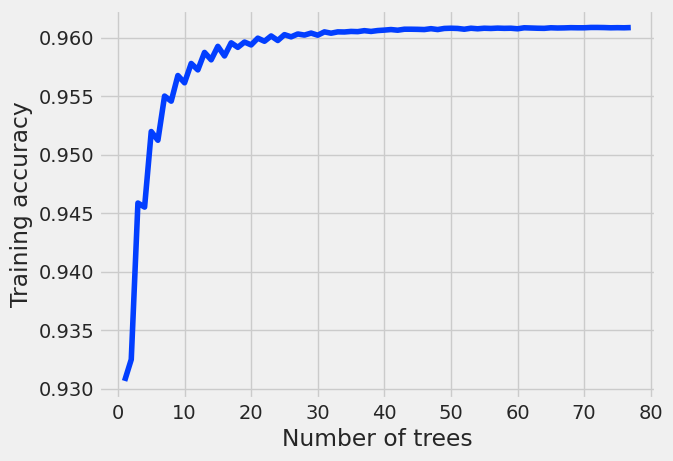

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

best_rf.fit(X_train, y_train)

# Get the training set predictions
y_train_pred = best_rf.predict(X_train)

# Get the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Plot the progression of the accuracy score over training
train_accuracies = []
for i in range(1, 78):
    clf = RandomForestClassifier(
        n_estimators=i
        )
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

plt.plot(range(1, 78), train_accuracies)
plt.xlabel('Number of trees')
plt.ylabel('Training accuracy')
plt.show()

## Feature Importances

We can now find and interpret feature importances for our model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(max_depth= 9, min_samples_leaf= 4, min_samples_split=2, n_estimators= 77, random_state = 42)

In [ ]:
best_rf.fit(X_train, y_train)

best_rf.feature_importances_

array([0.00756571, 0.03774208, 0.4116452 , 0.00460679, 0.03899558,
       0.05066706, 0.0669302 , 0.04588442, 0.05102846, 0.01125587,
       0.04556593, 0.07292062, 0.04561717, 0.10957492])

In [ ]:
X_train.columns

Index(['Gender', 'Race', 'Age', 'US_Citizen', 'Education_Level_Adult',
       'Marital_Status', 'Num_Household', 'Household_Income',
       'Income_Poverty_Ratio', 'Bad_Air_Quality_Change', 'Chest_Pain',
       'General_Health_Condition', 'Height', 'Weight'],
      dtype='object')

Top Features: (**'Age'**, 'Weight', 'General_Health_Condition','Num_household')

Note that these features were the most important, but in order to achieve the 88% accuracy on the validation set, it is a combination of many features and it is good to see that for the most part the model is largely distributed across all features to avoid variability and increase robustness

## Run on Test Set

In [ ]:
y_test_pred = best_rf.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.8044555951877154

We get a score of 80% on the test set, which is much lower than against the validation set. This is relatively surprising, but still a good accuracy score for predicting diabetes risk given the data and much higher than the baseline target.

## Room for Improvement


1. Balancing the DataSet
- Right now our data set is skewed such that around 70 percent of those sampled dont have diabetes risk. Ideally, this would be closer to 50/50 for better fit

2. Deeper Hyperparameter optimization (Bayesian)
- Rather than the random optimization we did above, we could do a more precise bayesian optimization to improve upon each iteration of parameters

3. Better imputation (KNN vs Mean-imputation)
- Above we did a simple mean-imputation for missing values, but a more accurate method wouldve been KNN imputation, however this wouldve taken too long to run for us due to the size of our dataset.

#5. Analysis/Conclusion

Although our modeling attempts seem to consider only a small subset of demographic features to estimate diabetes presentation it is quite clear that there is some power to such an approach. As expected age seems to be the biggest predictor of diabetes status and presents a very important area of study to better understand how diabetes develops in a particular population, and potential areas of diabetes prevention such as better screening techniques.

The fact that the random forest classifier was the best model for guessing diabetic status indicates that sets of binary choices rather than some sort of logistic regression is better for predicting diabetes. This implies that meeting a certain set of conditions predispose an individual to diabetes. In conclusion, the random forest classifier is a powerful machine learning algorithm that has been successfully applied to model diabetes. By using a combination of patient data such as age, body mass index (BMI), blood pressure, and glucose levels, the classifier can accurately predict whether an individual has diabetes or not. Through feature importance analysis, it has been identified that glucose levels and BMI are the most indicative features of diabetic status. These findings provide valuable insights for healthcare professionals in the diagnosis and management of diabetes. The use of random forest classifiers and feature importance analysis can lead to more efficient and accurate diagnoses, ultimately improving patient outcomes.
Future analysis would explore the relationship between nutrition and diabetes which we were unable to do because of the lack of large amounts of nutrition data.   